# 2012 Election Data Analysis

In this project we will analyze two datasets. The first data set will be the results of political polls. We will analyze this aggregated poll data and answer some questions:

1) Who was being polled and what was their party affiliation?

2) Did the poll results favor Romney or Obama?

3) How do undecided voters effect the poll?

4) Can we account for the undecided voters?

5) How did voter sentiment change over time?

6) Can we see an effect in the polls from the debates?


Lets start with our standard imports

In [487]:
# For data
import pandas as pd
from pandas import Series,DataFrame,DatetimeIndex
import numpy as np

# For visualization
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

from __future__ import division

We have our data so lets create the DataFrame with the downloaded csv

In [488]:
poll_df = pd.read_csv('/Users/alexreynolds/Documents/Data Projects/Election Analysis/2012generalelectiondata.csv')

Preview the dataset

In [489]:
poll_df.head()

,Pollster,Start Date,End Date,Entry Date/Time (ET),Number of Observations,Population,Mode,Obama,Romney,Undecided,Other,Pollster URL,Source URL,Partisan,Affiliation,Question Text,Question Iteration
0,Politico/GWU/Battleground,11/4/12,11/5/12,2012-11-06T08:40:26Z,1000.0,Likely Voters,Live Phone,47,47,6.0,NaN,https://elections.huffingtonpost.com/pollster/...,http://www.politico.com/news/stories/1112/8338...,Nonpartisan,None,NaN,1
1,YouGov/Economist,11/3/12,11/5/12,2012-11-26T15:31:23Z,740.0,Likely Voters,Internet,49,47,3.0,NaN,https://elections.huffingtonpost.com/pollster/...,http://cdn.yougov.com/cumulus_uploads/document...,Nonpartisan,None,NaN,1
2,Gravis Marketing,11/3/12,11/5/12,2012-11-06T09:22:02Z,872.0,Likely Voters,Automated Phone,48,48,4.0,NaN,https://elections.huffingtonpost.com/pollster/...,http://www.gravispolls.com/2012/11/gravis-mark...,Nonpartisan,None,NaN,1
3,IBD/TIPP,11/3/12,11/5/12,2012-11-06T08:51:48Z,712.0,Likely Voters,Live Phone,50,49,NaN,1.0,https://elections.huffingtonpost.com/pollster/...,http://news.investors.com/special-report/50841...,Nonpartisan,None,NaN,1
4,Rasmussen,11/3/12,11/5/12,2012-11-06T08:47:50Z,1500.0,Likely Voters,Automated Phone,48,49,NaN,NaN,https://elections.huffingtonpost.com/pollster/...,http://www.rasmussenreports.com/public_content...,Nonpartisan,None,NaN,1


In [490]:
poll_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 586 entries, 0 to 585
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Pollster                586 non-null    object 
 1   Start Date              586 non-null    object 
 2   End Date                586 non-null    object 
 3   Entry Date/Time (ET)    586 non-null    object 
 4   Number of Observations  564 non-null    float64
 5   Population              586 non-null    object 
 6   Mode                    586 non-null    object 
 7   Obama                   586 non-null    int64  
 8   Romney                  586 non-null    int64  
 9   Undecided               423 non-null    float64
 10  Other                   202 non-null    float64
 11  Pollster URL            586 non-null    object 
 12  Source URL              584 non-null    object 
 13  Partisan                586 non-null    object 
 14  Affiliation             586 non-null    ob

Quick Visualization of the affiliation of the polls using countplot

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Affiliation', ylabel='count'>

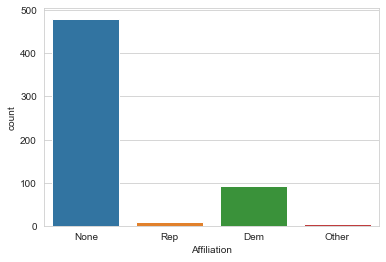

In [491]:
sns.countplot('Affiliation', data = poll_df)

Overall, neutral affilication but is leaning toward democratic.  This will have to be kept in mind during our analysis.

Lets see if sorting by population gives any further insight into data

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Affiliation', ylabel='count'>

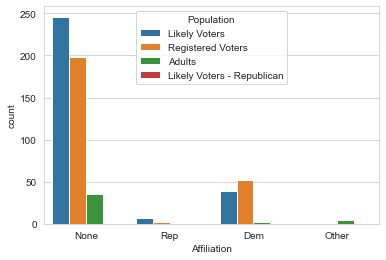

In [492]:
sns.countplot('Affiliation', data=poll_df, hue='Population')

See a strong prescense of likely and registered voters so the poll data should be a good reflection on the populations polled.

Lets look at averages for Obama, Romney, and the undecided

In [493]:
#Get the average 
avg= pd.DataFrame(poll_df.mean())

avg.drop(['Number of Observations','Other','Question Text','Question Iteration'], axis=0,inplace=True)


In [494]:
avg.head()

,0
Obama,46.805461
Romney,44.614334
Undecided,6.550827


In [495]:
#Get the error
std = pd.DataFrame(poll_df.std())
std.drop(['Number of Observations','Other','Question Text','Question Iteration'],axis=0,inplace=True)

In [496]:
std.head()

,0
Obama,2.422058
Romney,2.906180
Undecided,3.701754


<AxesSubplot:>

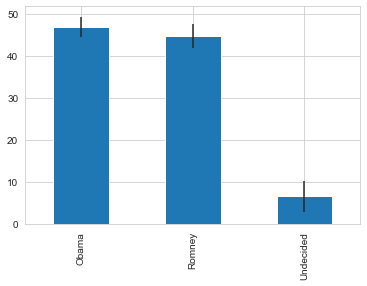

In [497]:
#Plot avg and std with yerr
avg.plot(yerr=std,kind='bar',legend=False)

Interesting to see how close this race is, especially with the undecided factor

In [498]:
#Combine avg and std DataFrames
poll_avg = pd.concat([avg,std],axis=1)

In [499]:
#Rename Columns
poll_avg.columns=['Average','STD']

In [500]:
#Show
poll_avg

,Average,STD
Obama,46.805461,2.422058
Romney,44.614334,2.906180
Undecided,6.550827,3.701754


Numbers show a close race too. It seems to come down to the undecided voters.  If we assume the undecided voters will split their votes evenly, it should be an unbiased estimate of the final difference.

First lets look at a time series analysis by looking at voter sentiment versus the Poll End Dates.

<AxesSubplot:xlabel='End Date'>

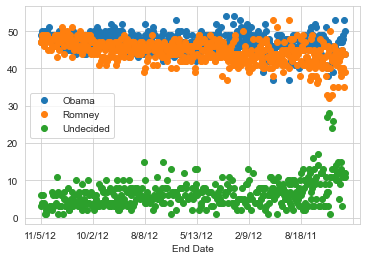

In [501]:
poll_df.plot(x='End Date',y=['Obama','Romney','Undecided'],linestyle='',marker='o')

We can see that the race gets closer as the elction approaches (time is represented backwards here so closer to election is on the left). Lets plot out the difference between Obama and Romney and has it changes as time moves alone. 

In [502]:
#for timestamps
from datetime import datetime

Create a new column for the difference between Romney and Obama in th polls

In [503]:
poll_df['Difference'] = (poll_df.Obama - poll_df.Romney)/100

In [504]:
poll_df.head()

,Pollster,Start Date,End Date,Entry Date/Time (ET),Number of Observations,Population,Mode,Obama,Romney,Undecided,Other,Pollster URL,Source URL,Partisan,Affiliation,Question Text,Question Iteration,Difference
0,Politico/GWU/Battleground,11/4/12,11/5/12,2012-11-06T08:40:26Z,1000.0,Likely Voters,Live Phone,47,47,6.0,NaN,https://elections.huffingtonpost.com/pollster/...,http://www.politico.com/news/stories/1112/8338...,Nonpartisan,None,NaN,1,0.00
1,YouGov/Economist,11/3/12,11/5/12,2012-11-26T15:31:23Z,740.0,Likely Voters,Internet,49,47,3.0,NaN,https://elections.huffingtonpost.com/pollster/...,http://cdn.yougov.com/cumulus_uploads/document...,Nonpartisan,None,NaN,1,0.02
2,Gravis Marketing,11/3/12,11/5/12,2012-11-06T09:22:02Z,872.0,Likely Voters,Automated Phone,48,48,4.0,NaN,https://elections.huffingtonpost.com/pollster/...,http://www.gravispolls.com/2012/11/gravis-mark...,Nonpartisan,None,NaN,1,0.00
3,IBD/TIPP,11/3/12,11/5/12,2012-11-06T08:51:48Z,712.0,Likely Voters,Live Phone,50,49,NaN,1.0,https://elections.huffingtonpost.com/pollster/...,http://news.investors.com/special-report/50841...,Nonpartisan,None,NaN,1,0.01
4,Rasmussen,11/3/12,11/5/12,2012-11-06T08:47:50Z,1500.0,Likely Voters,Automated Phone,48,49,NaN,NaN,https://elections.huffingtonpost.com/pollster/...,http://www.rasmussenreports.com/public_content...,Nonpartisan,None,NaN,1,-0.01


Keep in mind that the difference is Obama minus Romney, thus a positive difference indicates a leaning towards Obama in the polls.

Now lets see if we can visualize how this differene changes over time.

In [505]:
# Set as_index=Flase to keep the 0,1,2,... index. Then we'll take the mean of the polls on that day.
poll_df = poll_df.groupby(['Start Date'],as_index=False).mean()

# Let's go ahead and see what this looks like
poll_df.head()

,Start Date,Number of Observations,Obama,Romney,Undecided,Other,Question Text,Question Iteration,Difference
0,1/1/11,1500.0,42.000000,41.0,7.000000,10.000000,NaN,1.0,0.010000
1,1/11/12,1067.5,48.500000,46.5,4.000000,1.500000,NaN,1.0,0.020000
2,1/12/10,900.0,47.000000,35.0,10.000000,5.000000,NaN,1.0,0.120000
3,1/12/12,963.5,45.666667,46.0,6.333333,1.333333,NaN,1.0,-0.003333
4,1/13/12,700.0,49.000000,44.0,7.000000,NaN,NaN,1.0,0.050000


We need to convert the start date to datetime format so we can sort DataFrame by time.

In [506]:
#import datetime
from datetime import datetime

#Create new list from Start Date
dates = poll_df['Start Date']
ind=0

#For loop to change newly created list "dates" to datetime format
for d in dates:
    dates[ind] = datetime.strptime(d, "%m/%d/%y")
    ind +=1

<ipython-input-506-e159e852c7f5>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dates[ind] = datetime.strptime(d, "%m/%d/%y")


Now that we have a list "dates" with datetime format, we need to import new "dates" list back into "Start Date"

In [507]:
poll_df['Start Date'] = dates

Confirm changes were made correctly

In [508]:
poll_df.head()

,Start Date,Number of Observations,Obama,Romney,Undecided,Other,Question Text,Question Iteration,Difference
0,2011-01-01 00:00:00,1500.0,42.000000,41.0,7.000000,10.000000,NaN,1.0,0.010000
1,2012-01-11 00:00:00,1067.5,48.500000,46.5,4.000000,1.500000,NaN,1.0,0.020000
2,2010-01-12 00:00:00,900.0,47.000000,35.0,10.000000,5.000000,NaN,1.0,0.120000
3,2012-01-12 00:00:00,963.5,45.666667,46.0,6.333333,1.333333,NaN,1.0,-0.003333
4,2012-01-13 00:00:00,700.0,49.000000,44.0,7.000000,NaN,NaN,1.0,0.050000


Changes were made correctly but lets get them sorted in correct time series order.  Also update the index to new order

In [509]:
poll_df.sort_values(by=['Start Date'], inplace=True, ignore_index = True)

Now lets plot the difference

<AxesSubplot:xlabel='Start Date'>

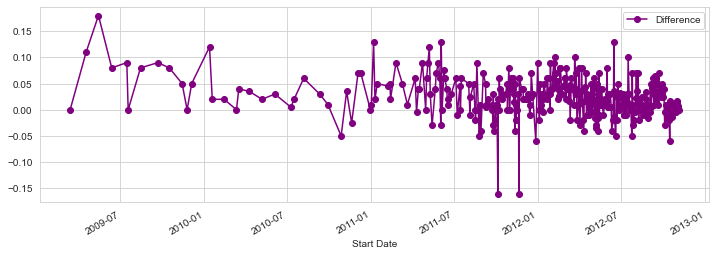

In [510]:
poll_df.plot('Start Date','Difference',figsize=(12,4),marker='o',color='purple')

We see a few major jumps in difference between the two candidates.  Itd be interesting to see how the debates played a role into these jumps

The debates that year occured on Oct 3rd, 11th, and 22nd. Lets plot some lines as markers for these dates

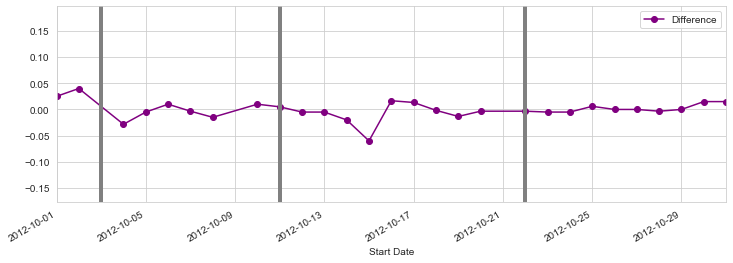

In [511]:
import datetime as dt

#Create time series visualization for month of october '12
fig=poll_df.plot('Start Date','Difference',figsize=(12,4),marker='o',color='purple',xlim=(dt.datetime(2012, 10, 1),dt.datetime(2012, 10, 31)))

#Oct 3rd line marker
plt.axvline(x=dt.datetime(2012, 10, 3) ,linewidth=4,color='grey')
#Oct 11th line marker
plt.axvline(x=dt.datetime(2012, 10, 11),linewidth=4,color='grey')
#Oct 22nd line marker
plt.axvline(x=dt.datetime(2012, 10, 22),linewidth=4,color='grey')

We see a more a dip for Obama towards Romney after the first two debates.  It would be intersting to see where these polls were conducted to see if their historically Republican or Democrat.

Now lets look at some donations to candidates campaigns.

## Donor Data Set

The questions we will be trying to answer while looking at this Data Set is:

1) How much was donated and what was the average donation?

2) How did the donations differ between candidates?

3) How did the donations differ between Democrats and Republicans?

4) What were the demographics of the donors?

5) Is there a pattern to donation amounts?

In [512]:
#Import dataset into a DataFrame
donor_df = pd.read_csv('/Users/alexreynolds/Documents/Data Projects/Election Analysis/Election_Donor_Data.csv')

/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3146: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [513]:
#Overview of the dat
donor_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1001731 entries, 0 to 1001730
Data columns (total 16 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   cmte_id            1001731 non-null  object 
 1   cand_id            1001731 non-null  object 
 2   cand_nm            1001731 non-null  object 
 3   contbr_nm          1001731 non-null  object 
 4   contbr_city        1001712 non-null  object 
 5   contbr_st          1001727 non-null  object 
 6   contbr_zip         1001620 non-null  object 
 7   contbr_employer    988002 non-null   object 
 8   contbr_occupation  993301 non-null   object 
 9   contb_receipt_amt  1001731 non-null  float64
 10  contb_receipt_dt   1001731 non-null  object 
 11  receipt_desc       14166 non-null    object 
 12  memo_cd            92482 non-null    object 
 13  memo_text          97770 non-null    object 
 14  form_tp            1001731 non-null  object 
 15  file_num           1001731 non-n

We have a fairly large dataset with over a million rows of data.

In [514]:
#Preview  what the first few rows of data look like
donor_df.head()

,cmte_id,cand_id,cand_nm,contbr_nm,contbr_city,contbr_st,contbr_zip,contbr_employer,contbr_occupation,contb_receipt_amt,contb_receipt_dt,receipt_desc,memo_cd,memo_text,form_tp,file_num
0,C00410118,P20002978,"Bachmann, Michelle","HARVEY, WILLIAM",MOBILE,AL,3.6601e+08,RETIRED,RETIRED,250.0,20-JUN-11,NaN,NaN,NaN,SA17A,736166
1,C00410118,P20002978,"Bachmann, Michelle","HARVEY, WILLIAM",MOBILE,AL,3.6601e+08,RETIRED,RETIRED,50.0,23-JUN-11,NaN,NaN,NaN,SA17A,736166
2,C00410118,P20002978,"Bachmann, Michelle","SMITH, LANIER",LANETT,AL,3.68633e+08,INFORMATION REQUESTED,INFORMATION REQUESTED,250.0,05-JUL-11,NaN,NaN,NaN,SA17A,749073
3,C00410118,P20002978,"Bachmann, Michelle","BLEVINS, DARONDA",PIGGOTT,AR,7.24548e+08,NONE,RETIRED,250.0,01-AUG-11,NaN,NaN,NaN,SA17A,749073
4,C00410118,P20002978,"Bachmann, Michelle","WARDENBURG, HAROLD",HOT SPRINGS NATION,AR,7.19016e+08,NONE,RETIRED,300.0,20-JUN-11,NaN,NaN,NaN,SA17A,736166


Probably would be helpful to see what the donation amounts look like.

In [515]:
#Get donation amounts and count of how many times that was donated
donor_df['contb_receipt_amt'].value_counts()

100.00    178188
50.00     137584
25.00     110345
250.00     91182
500.00     57984
           ...  
97.15          1
122.32         1
188.65         1
122.40         1
132.12         1
Name: contb_receipt_amt, Length: 8079, dtype: int64

There were 8079 different amounts donated.  Probably a lot of uneven dollar amounts (97.15, 122.32, 188.65) as we see at the end of the previous list.

Lets see what the average and standard deviation are.

In [516]:
#Get the mean donation
don_mean = donor_df['contb_receipt_amt'].mean()

#Get the std of the donations
don_std = donor_df['contb_receipt_amt'].std()

print('The average donation was %.2f with a std of %.2f' %(don_mean,don_std))

The average donation was 298.24 with a std of 3749.67


We see a large standard deviation compared to the average.  There must be some large donations or something leading to this large standard deviation. Lets see if we can find out what is leading to this huge std.

In [517]:
#Create new Series from the DataFrame. Use copy to avoid view errors
top_donor = donor_df['contb_receipt_amt'].copy()

#Sort and view new series
top_donor.sort_values()

114604     -30800.00
226986     -25800.00
101356      -7500.00
398429      -5500.00
250737      -5455.00
             ...    
319478     526246.17
344419    1511192.17
344539    1679114.65
326651    1944042.43
325136    2014490.51
Name: contb_receipt_amt, Length: 1001731, dtype: float64

We have some negative values and some very large donations.  After a google search, the negative values are likely due to the FEC recording refunds as well as donations.  Even if they arent from this, we need to get rid of the negative values to only look at positive donations made.

In [518]:
#Remove negative values 
top_donor = top_donor[top_donor > 0]

#Sort series again
top_donor = top_donor.sort_values()

Weve got rid of all the negatives and sorted the series again.  Lets see what the most common donations were again

In [519]:
#View the top 10 most common donations
top_donor.value_counts().head(10)

100.0     178188
50.0      137584
25.0      110345
250.0      91182
500.0      57984
2500.0     49005
35.0       37237
1000.0     36494
10.0       33986
200.0      27813
Name: contb_receipt_amt, dtype: int64

See the most common dondations were 100, 50, 25 dollars but top 10 most common ranged from 10 dollars to 2500 dollars.

Most of these common donations are more round numbers (10,20,25,50,100,500,1000 etc).  Lets visualize the data to see if this is true

<AxesSubplot:>

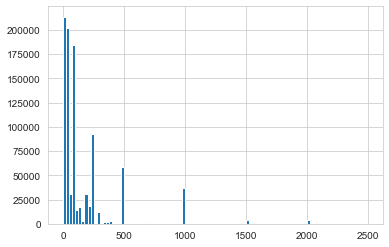

In [520]:
#Create a Series of the common donations less than 2500
com_don = top_donor[top_donor < 2500]

#Plot a histogram with 100 bins to account for non_round donations and to see histogram for spikes
com_don.hist(bins=100)


Here we can see that the spikes are at the round numbers as we thought.

Next, lets see what the donations look like by party.  Well first need to create a new 'Party' column for each candidate

In [521]:
#Get a list of the unique names for the candidate columns
candidates = donor_df.cand_nm.unique()

#Show all the candidates
candidates

array(['Bachmann, Michelle', 'Romney, Mitt', 'Obama, Barack',
       "Roemer, Charles E. 'Buddy' III", 'Pawlenty, Timothy',
       'Johnson, Gary Earl', 'Paul, Ron', 'Santorum, Rick',
       'Cain, Herman', 'Gingrich, Newt', 'McCotter, Thaddeus G',
       'Huntsman, Jon', 'Perry, Rick'], dtype=object)

Now that we have all the candidates we need to assign a party to them. We know Obama was the only democrat and the rest are republicans so lets use mapping along with a dictonary ot assign party affiliations. 

In [522]:
# Dictionary of party affiliation
party_map = {'Bachmann, Michelle': 'Republican',
           'Cain, Herman': 'Republican',
           'Gingrich, Newt': 'Republican',
           'Huntsman, Jon': 'Republican',
           'Johnson, Gary Earl': 'Republican',
           'McCotter, Thaddeus G': 'Republican',
           'Obama, Barack': 'Democrat',
           'Paul, Ron': 'Republican',
           'Pawlenty, Timothy': 'Republican',
           'Perry, Rick': 'Republican',
           "Roemer, Charles E. 'Buddy' III": 'Republican',
           'Romney, Mitt': 'Republican',
           'Santorum, Rick': 'Republican'}

#Use mapping to assign party affiliation
donor_df['Party'] = donor_df.cand_nm.map(party_map)

Next lets make sure we clear any negative/refund amounts from the contributions.

In [523]:
#Clear refunds
donor_df = donor_df[donor_df.contb_receipt_amt >0]

#Preview DF
donor_df.head()

,cmte_id,cand_id,cand_nm,contbr_nm,contbr_city,contbr_st,contbr_zip,contbr_employer,contbr_occupation,contb_receipt_amt,contb_receipt_dt,receipt_desc,memo_cd,memo_text,form_tp,file_num,Party
0,C00410118,P20002978,"Bachmann, Michelle","HARVEY, WILLIAM",MOBILE,AL,3.6601e+08,RETIRED,RETIRED,250.0,20-JUN-11,NaN,NaN,NaN,SA17A,736166,Republican
1,C00410118,P20002978,"Bachmann, Michelle","HARVEY, WILLIAM",MOBILE,AL,3.6601e+08,RETIRED,RETIRED,50.0,23-JUN-11,NaN,NaN,NaN,SA17A,736166,Republican
2,C00410118,P20002978,"Bachmann, Michelle","SMITH, LANIER",LANETT,AL,3.68633e+08,INFORMATION REQUESTED,INFORMATION REQUESTED,250.0,05-JUL-11,NaN,NaN,NaN,SA17A,749073,Republican
3,C00410118,P20002978,"Bachmann, Michelle","BLEVINS, DARONDA",PIGGOTT,AR,7.24548e+08,NONE,RETIRED,250.0,01-AUG-11,NaN,NaN,NaN,SA17A,749073,Republican
4,C00410118,P20002978,"Bachmann, Michelle","WARDENBURG, HAROLD",HOT SPRINGS NATION,AR,7.19016e+08,NONE,RETIRED,300.0,20-JUN-11,NaN,NaN,NaN,SA17A,736166,Republican


Next we need to aggregate data by candidate and view their total amounts received and total number of donations

In [524]:
#Groupby candidate then see total number of people who donated
donor_df.groupby('cand_nm')['contb_receipt_amt'].count()

cand_nm
Bachmann, Michelle                 13082
Cain, Herman                       20052
Gingrich, Newt                     46883
Huntsman, Jon                       4066
Johnson, Gary Earl                  1234
McCotter, Thaddeus G                  73
Obama, Barack                     589127
Paul, Ron                         143161
Pawlenty, Timothy                   3844
Perry, Rick                        12709
Roemer, Charles E. 'Buddy' III      5844
Romney, Mitt                      105155
Santorum, Rick                     46245
Name: contb_receipt_amt, dtype: int64

See a huge difference for Obama vs any other candidate as he is not competing against any other democratic nominee, this makes sense.  

Lets see the total amount of money received

In [525]:
#Groupby candidate and then display total amount of money donated
donor_df.groupby('cand_nm')['contb_receipt_amt'].sum()

cand_nm
Bachmann, Michelle                2.711439e+06
Cain, Herman                      7.101082e+06
Gingrich, Newt                    1.283277e+07
Huntsman, Jon                     3.330373e+06
Johnson, Gary Earl                5.669616e+05
McCotter, Thaddeus G              3.903000e+04
Obama, Barack                     1.358774e+08
Paul, Ron                         2.100962e+07
Pawlenty, Timothy                 6.004819e+06
Perry, Rick                       2.030575e+07
Roemer, Charles E. 'Buddy' III    3.730099e+05
Romney, Mitt                      8.833591e+07
Santorum, Rick                    1.104316e+07
Name: contb_receipt_amt, dtype: float64

This is very hard to read so lets find an easier way to see this data.

Maybe if we use a for loop to print the values out itll be easier to read.

In [526]:
#Create an object using the groupby
cand_amount = donor_df.groupby('cand_nm')['contb_receipt_amt'].sum()

#index tracker
i=0


for don in cand_amount:
    print('The candidate %s raised %.0f dollars' %(cand_amount.index[i],don))
    print('\n')
    i+=1

The candidate Bachmann, Michelle raised 2711439 dollars


The candidate Cain, Herman raised 7101082 dollars


The candidate Gingrich, Newt raised 12832770 dollars


The candidate Huntsman, Jon raised 3330373 dollars


The candidate Johnson, Gary Earl raised 566962 dollars


The candidate McCotter, Thaddeus G raised 39030 dollars


The candidate Obama, Barack raised 135877427 dollars


The candidate Paul, Ron raised 21009620 dollars


The candidate Pawlenty, Timothy raised 6004819 dollars


The candidate Perry, Rick raised 20305754 dollars


The candidate Roemer, Charles E. 'Buddy' III raised 373010 dollars


The candidate Romney, Mitt raised 88335908 dollars


The candidate Santorum, Rick raised 11043159 dollars




This is a little better but still hard to see.  Lets visualize it

<AxesSubplot:xlabel='cand_nm'>

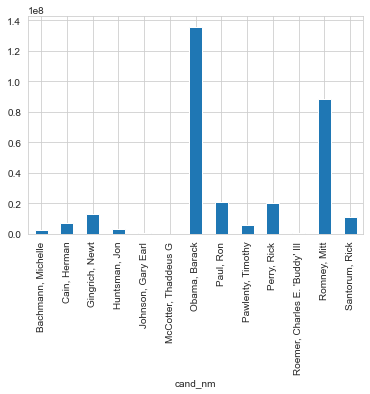

In [527]:
#Plot total donation amounts
cand_amount.plot(kind='bar')

Much better and easier to compare.  As we saw with the total people who donated, Obama is the clear advantage in donation amounts too. Again likely because hes not competing against any other democratic nominees.  Lets see  what this looks like comparing republican vs democrate.

<AxesSubplot:xlabel='Party'>

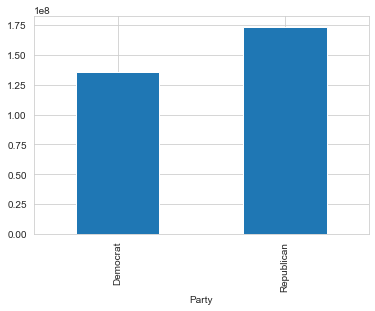

In [528]:
#Groupby party then count donation amounts
donor_df.groupby('Party')['contb_receipt_amt'].sum().plot(kind='bar')

Here we see that the republicans had more total donated but this amount was across many candidates

Finally, let see what occupations these donations came from.

In [529]:
#Use a pivot table to  extract and organize data by donor occupation
occupation_df = donor_df.pivot_table('contb_receipt_amt',index = 'contbr_occupation',columns = 'Party',aggfunc='sum')

In [530]:
#Preview this DF
occupation_df.head()

Party,Democrat,Republican
contbr_occupation,,
MIXED-MEDIA ARTIST / STORYTELLER,100.0,NaN
AREA VICE PRESIDENT,250.0,NaN
RESEARCH ASSOCIATE,100.0,NaN
TEACHER,500.0,NaN
THERAPIST,3900.0,NaN


In [531]:
#Check size of DF
occupation_df.shape

(45067, 2)

Over 45000 different occupations donated which is probably too large to have an effective analysis. Lets have cut-off total contribution amount.  Small 50 dollar donations by one type of profession wont give much insigh anyways.  

Lets set the cut off at 1 million dollars to see what this gives us

In [532]:
#Set cut off at 1000000
occupation_df = occupation_df[occupation_df.sum(1) > 1000000]

In [533]:
#Recheck size
occupation_df.shape

(31, 2)

Much more managable.  Lets see what a visualization looks like

<AxesSubplot:xlabel='contbr_occupation'>

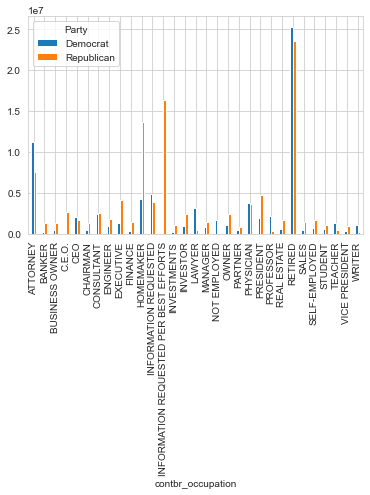

In [534]:
# plot out with pandas
occupation_df.plot(kind='bar')

This is ok but kind of hard to read.  Lets see what a horizontal bar graph looks like 

<AxesSubplot:ylabel='contbr_occupation'>

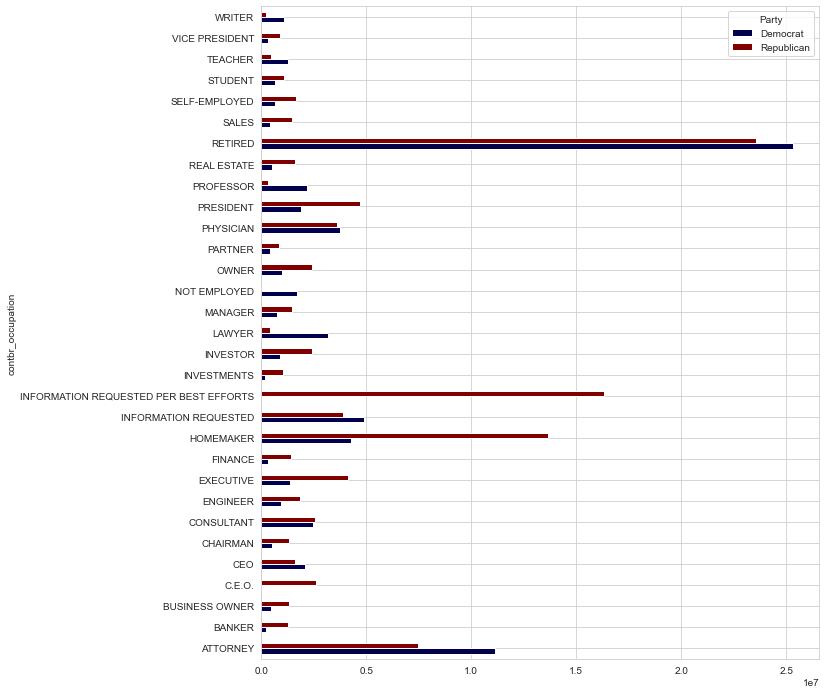

In [535]:
#Horizontal bar plot
occupation_df.plot(kind='barh',figsize=(10,12),cmap ='seismic')

We see some occupations that a mislabled or arent occupations.  So lets get rid of them and combine CEO and C.E.O.

In [536]:
#Drop irrelevant occupations
occupation_df.drop(['INFORMATION REQUESTED PER BEST EFFORTS','INFORMATION REQUESTED'],axis=0,inplace=True)

In [537]:
#Combine CEO and C.E.O.
occupation_df.loc['CEO'] = occupation_df.loc['CEO'] + occupation_df.loc['C.E.O.']

occupation_df.drop('C.E.O.', inplace = True)

<AxesSubplot:ylabel='contbr_occupation'>

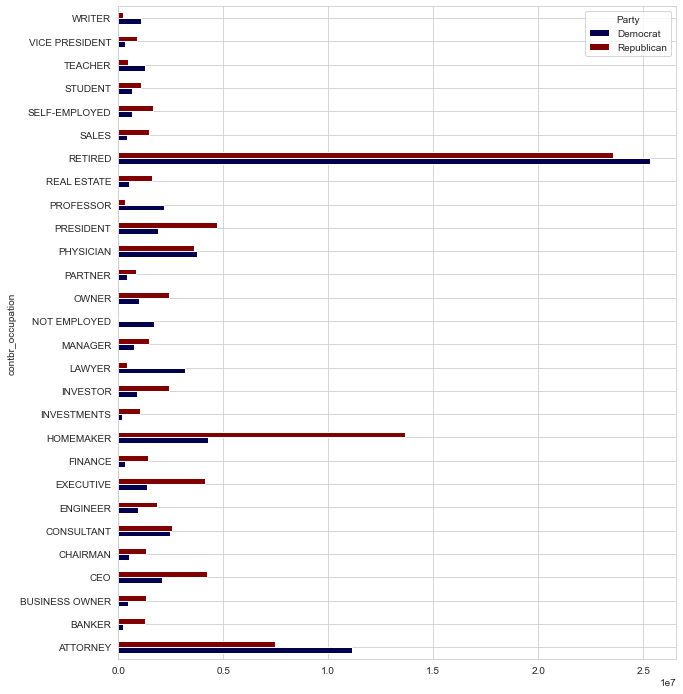

In [538]:
#Repeat Previous plot
occupation_df.plot(kind='barh',figsize=(10,12),cmap='seismic')

Much easier to read and compare. We see CEO/President/Homemaker are more conservate leaning while Professor/Attorney/Lawyers are more liberal.